# Your info

Full name: Ali Sedaghi

Student ID: 97521378

Notice: **You can add new cells for each part.**

# Q1

In [224]:
# Q1_graded
import random
import numpy
import matplotlib.pyplot as plt

class TSP_GA:
  def __init__(self, generations, population_size,
               elitist_rate, mutation_rate):
    self.cities = set()
    self.paths = []
    self.population = []
    self.population_size = population_size
    self.elitist_rate = elitist_rate
    self.generations = generations
    self.mutation_rate = mutation_rate

  def add_path(self, city1, city2, distance):
    self.cities.add(city1)
    self.cities.add(city2)
    self.paths.append(({city1, city2}, distance))
  
  def create_chromosome(self):
    chromosome = list(self.cities)
    random.shuffle(chromosome)
    return chromosome

  def create_population(self):
    for _ in range(self.population_size):
      chromosome = self.create_chromosome()
      self.population.append(chromosome)

  def distance(self, src, dst):
    for path, distance in self.paths:
      if src in path and dst in path:
        return distance
    return float(50)

  def route_distance(self, chromosome):
    size = len(chromosome)
    total_distance = 0
    for i in range(size):
      src = chromosome[i]
      dst = chromosome[i + 1] if (i + 1 != size) else chromosome[0]
      distance = self.distance(src, dst)
      total_distance += distance
    return total_distance

  def fitness(self, chromosome):
    route_distance = self.route_distance(chromosome)
    return float (1 / route_distance)

  def crossover(self, parent1, parent2):
    size = len(parent1)
    child_part1 = []
    child_part2 = []
    cross1 = int(random.random() * size)
    cross2 = int(random.random() * size)
    start = min(cross1, cross2)
    end = max(cross1, cross2)
    for i in range(start, end):
      child_part1.append(parent1[i])
    child_part2 = [item for item in parent2 if item not in child_part1]
    child = child_part1 + child_part2
    return child

  def mutate(self, chromosome):
    size = len(chromosome)
    new = chromosome
    for i in range(size):
      if random.random() < self.mutation_rate:
        j = int (random.random() * size)
        city1 = chromosome[i]
        city2 = chromosome[j]
        new[i] = city2
        new[j] = city1
    return new

  def ranked_population(self):
    return sorted(self.population,
                  key=lambda x: self.fitness(x),
                  reverse=True)
    
  def create_pool(self, ranked_pop):
    pool = []
    pop_size = len(ranked_pop)
    elitist_size = int (pop_size * self.elitist_rate)
    remain_size = pop_size - elitist_size

    for i in range(elitist_size):
      pool.append(ranked_pop[i])

    fits = [self.fitness(e) for e in ranked_pop]
    sum_fits = sum(fits)
    norm_fits = [e / sum_fits for e in fits]

    for i in range(remain_size):
      pick = random.random()
      for j in range(pop_size):
        if pick >= norm_fits[j]:
          pool.append(ranked_pop[j])
          break
      if pick < norm_fits[pop_size - 1]:
        pool.append(ranked_pop[pop_size - 1])

    return pool

  def crossover_pool(self, pool):
    new_pop = []
    pop_size = len(pool)
    elitist_size = int (pop_size * self.elitist_rate)
    remain_size = pop_size - elitist_size

    for i in range(elitist_size):
      new_pop.append(pool[i])
    
    for i in range(remain_size):
      parent1 = random.choice(pool)
      parent2 = random.choice(pool)
      child = self.crossover(parent1, parent2)
      new_pop.append(child)

    return new_pop

  def mutate_pool(self, pool):
    new_pop = []
    for i in range(len(pool)):
      mutated = self.mutate(pool[i])
      new_pop.append(mutated)
    return new_pop

  def set_population(self, new_pop):
    self.population = new_pop

  def next_generation(self):
    ranked_pop = self.ranked_population()
    pool = self.create_pool(ranked_pop)
    crossovered_pool = self.crossover_pool(pool)
    mutated_pool = self.mutate_pool(crossovered_pool)
    self.set_population(mutated_pool)
    
    # returned before new generation
    best_chromosome = ranked_pop[0]
    avg_fitness = sum([self.fitness(e) for e in ranked_pop]) / len(ranked_pop)
    return best_chromosome, avg_fitness

  def run(self):
    self.create_population()
    best_chromosomes = []
    avg_fitness = []
    for i in range(self.generations):
      best, avg = self.next_generation()
      best_chromosomes.append(best)
      avg_fitness.append(avg)
      self.print_log(i, avg, best, self.route_distance(best), self.fitness(best))
    
    ranked_pop = self.ranked_population()
    best = ranked_pop[0]
    avg = sum([self.fitness(e) for e in ranked_pop]) / len(ranked_pop)
    best_chromosomes.append(best)
    avg_fitness.append(avg)
    self.print_log(self.generations, avg, best, self.route_distance(best), self.fitness(best))

    return best_chromosomes, avg_fitness

  def print_log(self, i, avg, best, best_dist, best_fit):
    print('Generation:', i)
    print('Average Fitness:', avg)
    print('Best Chromosomes:', best)
    print('Total Distance:', best_dist)
    print('Fitness:', best_fit)
    print('----------------')

In [225]:
# Q1_graded
POPULATION_SIZE = 100
ELITIST_RATE = 0.2
GENERATIONS = 10
MUTATION_RATE = 0.1

temp = TSP_GA(GENERATIONS, POPULATION_SIZE, ELITIST_RATE, MUTATION_RATE)
temp.add_path('1', '2', 12)
temp.add_path('1', '3', 10)
temp.add_path('1', '7', 12)
temp.add_path('2', '3', 8)
temp.add_path('2', '4', 12)
temp.add_path('3', '4', 11)
temp.add_path('3', '5', 3)
temp.add_path('3', '7', 9)
temp.add_path('4', '5', 11)
temp.add_path('4', '6', 10)
temp.add_path('5', '6', 6)
temp.add_path('5', '7', 7)
temp.add_path('6', '7', 9)

In [226]:
# Q1_graded
bests, avg_fitness = temp.run()
bests_fitness = numpy.array([temp.fitness(e) for e in bests])

Generation: 0
Average Fitness: 0.006279939827609538
Best Chromosomes: ['7', '5', '3', '1', '2', '4', '6']
Total Distance: 63
Fitness: 0.015873015873015872
----------------
Generation: 1
Average Fitness: 0.008260662989706487
Best Chromosomes: ['7', '5', '3', '1', '2', '6', '4']
Total Distance: 142.0
Fitness: 0.007042253521126761
----------------
Generation: 2
Average Fitness: 0.009111355735471012
Best Chromosomes: ['3', '4', '6', '7', '5', '2', '1']
Total Distance: 109.0
Fitness: 0.009174311926605505
----------------
Generation: 3
Average Fitness: 0.009604016431247033
Best Chromosomes: ['5', '1', '7', '3', '2', '4', '6']
Total Distance: 107.0
Fitness: 0.009345794392523364
----------------
Generation: 4
Average Fitness: 0.010073037224071968
Best Chromosomes: ['7', '5', '1', '3', '2', '4', '6']
Total Distance: 106.0
Fitness: 0.009433962264150943
----------------
Generation: 5
Average Fitness: 0.008896551930717578
Best Chromosomes: ['7', '5', '3', '6', '2', '4', '1']
Total Distance: 184.0


Text(0.5, 15.0, 'Generation')

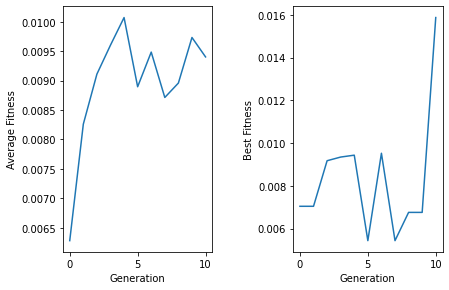

In [227]:
# Q1_graded
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(w_pad=5)

ax1.plot(avg_fitness)
ax1.set_ylabel('Average Fitness')
ax1.set_xlabel('Generation')

ax2.plot(bests_fitness)
ax2.set_ylabel('Best Fitness')
ax2.set_xlabel('Generation')

# Q2

In [228]:
# Q2_graded
import random
import numpy
import matplotlib.pyplot as plt

def digit_to_gray(x):
  if x == '0':
    return [0, 0, 0, 0]
  elif x == '1':
    return [0, 0, 0, 1]
  elif x == '2':
    return [0, 0, 1, 1]
  elif x == '3':
    return [0, 0, 1, 0]
  elif x == '4':
    return [0, 1, 1, 0]
  elif x == '5':
    return [0, 1, 1, 1]
  elif x == '6':
    return [0, 1, 0, 1]
  elif x == '7':
    return [0, 1, 0, 0]
  elif x == '8':
    return [1, 1, 0, 0]
  elif x == '9':
    return [1, 1, 0, 1]

def to_gray(x):
  result = []

  if x >= 0:
    result.append(0)
  else:
    result.append(1)

  x_str = str(abs(x))
  splitted = x_str.split('.')
  LHS = splitted[0]
  RHS = splitted[1]

  result.extend(digit_to_gray(LHS))
  result.extend(digit_to_gray(RHS))

  return result

def gray_to_digit(x):
  string = ''.join([str(bit) for bit in x])

  if string == '0000':
    return 0
  elif string == '0001':
    return 1
  elif string == '0011':
    return 2
  elif string == '0010':
    return 3
  elif string == '0110':
    return 4
  elif string == '0111':
    return 5
  elif string == '0101':
    return 6
  elif string == '0100':
    return 7
  elif string == '1100':
    return 8
  elif string == '1101':
    return 9
  return 0

def to_float(chromosome):
  sign = chromosome[0]
  LHS = chromosome[1:5]
  RHS = chromosome[5:9]

  string = ''

  if sign == 1:
    string += '-'
  
  string += str(gray_to_digit(LHS))
  string += '.'
  string += str(gray_to_digit(RHS))
  
  return round(float(string), 1)


class Root_GA:
  def __init__(self, generations, population_size,
               elitist_rate, mutation_rate):
    self.population = []
    self.population_size = population_size
    self.elitist_rate = elitist_rate
    self.generations = generations
    self.mutation_rate = mutation_rate

  def set_function(self, func, min_root, max_root, chromosome_length):
    self.func = func
    self.min_root = min_root
    self.max_root = max_root
    self.chromosome_length = chromosome_length
  
  def create_chromosome(self):
    x = random.uniform(-9.0, 9.0)
    x = round(x, 1)
    return to_gray(x)

  def create_population(self):
    for _ in range(self.population_size):
      chromosome = self.create_chromosome()
      self.population.append(chromosome)

  def fitness(self, chromosome):
    x = to_float(chromosome)
    fx = self.func(x)
    return 1 / (1 + abs(fx))

  def ranked_population(self):
    return sorted(self.population,
                  key=lambda x: self.fitness(x),
                  reverse=True)
    
  def create_pool(self, ranked_pop):
    pool = []
    pop_size = len(ranked_pop)
    elitist_size = int (pop_size * self.elitist_rate)
    remain_size = pop_size - elitist_size

    for i in range(elitist_size):
      pool.append(ranked_pop[i])

    fits = [self.fitness(e) for e in ranked_pop]
    sum_fits = sum(fits)
    norm_fits = [e / sum_fits for e in fits]

    for i in range(remain_size):
      pick = random.random()
      for j in range(pop_size):
        if pick >= norm_fits[j]:
          pool.append(ranked_pop[j])
          break
      if pick < norm_fits[pop_size - 1]:
        pool.append(ranked_pop[pop_size - 1])

    return pool

  def crossover(self, parent1, parent2):
    size = len(parent1)
    child_part1 = []
    child_part2 = []
    cross_point = int(random.random() * size)
    for i in range(0, cross_point):
      child_part1.append(parent1[i])
    for i in range(cross_point, size):
      child_part2.append(parent2[i])
    child = child_part1 + child_part2
    return child

  def mutate(self, chromosome):
    size = len(chromosome)
    new = chromosome
    for i in range(size):
      if random.random() < self.mutation_rate:
        new[i] = 1 - chromosome[i]
    return new

  def crossover_pool(self, pool):
    new_pop = []
    pop_size = len(pool)
    elitist_size = int (pop_size * self.elitist_rate)
    remain_size = pop_size - elitist_size

    for i in range(elitist_size):
      new_pop.append(pool[i])
    
    for i in range(remain_size):
      parent1 = random.choice(pool)
      parent2 = random.choice(pool)
      child = self.crossover(parent1, parent2)
      new_pop.append(child)

    return new_pop

  def mutate_pool(self, pool):
    new_pop = []
    for i in range(len(pool)):
      mutated = self.mutate(pool[i])
      new_pop.append(mutated)
    return new_pop

  def set_population(self, new_pop):
    self.population = new_pop

  def next_generation(self):
    ranked_pop = self.ranked_population()
    pool = self.create_pool(ranked_pop)
    crossovered_pool = self.crossover_pool(pool)
    mutated_pool = self.mutate_pool(crossovered_pool)
    self.set_population(mutated_pool)
    
    # returned before new generation
    best_chromosome = ranked_pop[0]
    avg_fitness = sum([self.fitness(e) for e in ranked_pop]) / len(ranked_pop)
    return best_chromosome, avg_fitness

  def run(self):
    self.create_population()
    best_chromosomes = []
    avg_fitness = []
    for i in range(self.generations):
      best, avg = self.next_generation()
      best_chromosomes.append(best)
      avg_fitness.append(avg)
      self.print_log(i, avg, best, to_float(best), self.fitness(best))
    
    ranked_pop = self.ranked_population()
    best = ranked_pop[0]
    avg = sum([self.fitness(e) for e in ranked_pop]) / len(ranked_pop)
    best_chromosomes.append(best)
    avg_fitness.append(avg)
    self.print_log(self.generations, avg, best, to_float(best), self.fitness(best))

    return best_chromosomes, avg_fitness

  def print_log(self, i, avg, best, best_root, best_fit):
    print('Generation:', i)
    print('Average Fitness:', avg)
    print('Best Chromosomes:', best)
    print('Best Root:', best_root)
    print('Fitness:', best_fit)
    print('----------------')

In [229]:
# Q2_graded
POPULATION_SIZE = 100
ELITIST_RATE = 0.2
GENERATIONS = 10
MUTATION_RATE = 0.1
FUNC = lambda x: 9 * (x) ** 5 - 194.7 * (x) ** 4 + 1680.1 * (x) ** 3 - 7227.94 * (x) ** 2 + 15501.2 * (x) - 13257.2

model = Root_GA(GENERATIONS, POPULATION_SIZE, ELITIST_RATE, MUTATION_RATE)
model.set_function(FUNC, -9, 9, 9)

In [230]:
# Q2_graded
bests, avg_fitness = model.run()
bests_fitness = numpy.array([model.fitness(e) for e in bests])

Generation: 0
Average Fitness: 0.06239711903722665
Best Chromosomes: [0, 0, 1, 1, 0, 0, 1, 0, 1]
Best Root: 4.6
Fitness: 0.9282637754708919
----------------
Generation: 1
Average Fitness: 0.4420807101912434
Best Chromosomes: [0, 1, 1, 1, 0, 1, 1, 0, 1]
Best Root: 0.9
Fitness: 0.0002463426273775402
----------------
Generation: 2
Average Fitness: 0.5379601033071139
Best Chromosomes: [0, 0, 1, 1, 0, 1, 1, 0, 1]
Best Root: 4.9
Fitness: 0.9780525018472449
----------------
Generation: 3
Average Fitness: 0.5219224860733657
Best Chromosomes: [1, 0, 1, 0, 0, 1, 1, 0, 1]
Best Root: -7.9
Fitness: 4.0808641309364305e-07
----------------
Generation: 4
Average Fitness: 0.5292383314169427
Best Chromosomes: [0, 0, 0, 1, 0, 1, 0, 0, 1]
Best Root: 3.0
Fitness: 0.03695491500370364
----------------
Generation: 5
Average Fitness: 0.5669310923178205
Best Chromosomes: [0, 0, 1, 1, 0, 1, 0, 1, 1]
Best Root: 4.0
Fitness: 0.8064516129069168
----------------
Generation: 6
Average Fitness: 0.5562630260075898
Best

Text(0.5, 15.0, 'Generation')

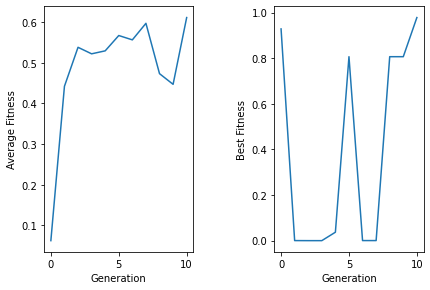

In [231]:
# Q2_graded
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(w_pad=5)

ax1.plot(avg_fitness)
ax1.set_ylabel('Average Fitness')
ax1.set_xlabel('Generation')

ax2.plot(bests_fitness)
ax2.set_ylabel('Best Fitness')
ax2.set_xlabel('Generation')

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
   

  according to the question number.
  - There are 2 assignments in Gradescope: 

    You should upload your **codes** and your **notebook** in `HW4` section and your final report for all of the questions as a **single pdf** file in `HW4 - Report`. Autograder will automatically check for:
    - `CI992_HW4.ipynb`
    - `Q1 Q1.py`
    - `Q2 Q2.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.